# Predicting flight delays (exploration)
Pierre-Yves BOISBUNON - Decembre 2017


----------

The target is to predict flight delays based on the dataset **https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time**

In this notebook, we will explore the dataset and clean some of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Exploration and Cleaning

Let's open the dataset, due to the amount of data, we will collect only **10000** samples for each month

Let's store the dataset for the future.

In [2]:
df = pd.read_csv('dataset.csv', sep=',', error_bad_lines=False)

In [3]:
df.shape

(120000, 65)

Let's display a column summary

In [4]:
import utils
test = utils.display_dataframe_stats(df)
test

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
type,int64,int64,int64,int64,int64,object,object,int64,object,object,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
number of unique values,1,4,12,31,7,366,12,12,12,4845,...,11,391,213,252,45,323,536,119,116,0
number of missing values,0,0,0,0,0,0,0,0,0,280,...,0,99562,99562,99562,99562,99562,119260,119260,119260,120000
% of missing values,0,0,0,0,0,0,0,0,0,0.233333,...,0,82.9683,82.9683,82.9683,82.9683,82.9683,99.3833,99.3833,99.3833,100


In [5]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,EV,20366,EV,N34110,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,17,7,2016-01-17,B6,20409,B6,N508JB,...,5.0,0.0,0.0,10.0,0.0,15.0,NaN,NaN,NaN,NaN
2,2016,1,1,22,5,2016-01-22,DL,19790,DL,N968AT,...,2.0,0.0,0.0,94.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2016,1,1,18,1,2016-01-18,WN,19393,WN,N238WN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,17,7,2016-01-17,OO,20304,OO,N925SW,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

## 1.1 Variable correlation

If we observe the correlation of the variables, **departure delay** and **carrier delay** are linked to **arrival delay**. For this project we can't predict these 2 variables.

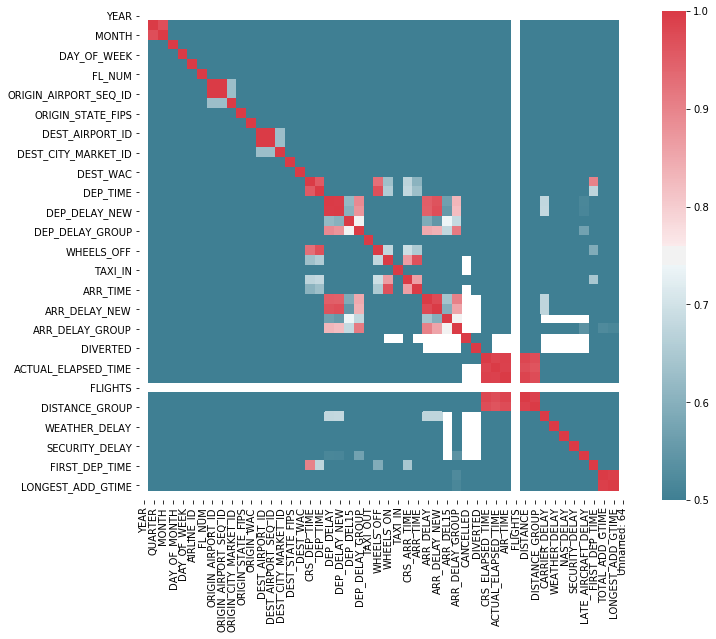

In [7]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin = 0.5, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True);

## 1.2 Airline

Let's analyse **airline** variable:

In [8]:
df['CARRIER'].describe()

count     120000
unique        12
top           WN
freq       27724
Name: CARRIER, dtype: object

and **unique_carrier** variable:

In [9]:
df['UNIQUE_CARRIER'].describe()

count     120000
unique        12
top           WN
freq       27724
Name: UNIQUE_CARRIER, dtype: object

In [10]:
all(df['UNIQUE_CARRIER'] == df['CARRIER'])

True

**CARRIER** and **UNIQUE_CARRIER** shows the same information. We can keep only one of them.

In [11]:
df['CARRIER'].unique()

array(['EV', 'B6', 'DL', 'WN', 'OO', 'F9', 'AA', 'UA', 'NK', 'VX', 'AS',
       'HA'], dtype=object)

In [12]:
df['AIRLINE_ID'].describe()

count    120000.000000
mean      19903.237725
std         381.683834
min       19393.000000
25%       19790.000000
50%       19805.000000
75%       20304.000000
max       21171.000000
Name: AIRLINE_ID, dtype: float64

In [13]:
airlines = df['AIRLINE_ID'].unique()
carriers = []
nb_carriers = []
for airline in airlines:
    carriers.append(len(np.unique(df[df.AIRLINE_ID == airline].CARRIER)))
my_df = pd.DataFrame({'airlines': airlines, 'carriers': carriers})
my_df.sort_values(by='carriers', ascending=False)

,airlines,carriers
0,20366,1
1,20409,1
2,19790,1
3,19393,1
4,20304,1
5,20436,1
6,19805,1
7,19977,1
8,20416,1
9,21171,1


**CARRIER** and **AIRLINES_ID** show the two same information.
Let's keep only **CARRIER** information.

## 1.3 Origin

Let's analyse **origin airport**:

In [14]:
df['ORIGIN_AIRPORT_ID'].describe()

count    120000.000000
mean      12681.718950
std        1538.689603
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14057.000000
max       16218.000000
Name: ORIGIN_AIRPORT_ID, dtype: float64

In [15]:
len(df['ORIGIN_AIRPORT_SEQ_ID'].unique())

317

In [16]:
df['ORIGIN'].describe()

count     120000
unique       308
top          ATL
freq        8403
Name: ORIGIN, dtype: object

In [17]:
df['ORIGIN_CITY_NAME'].describe()

count          120000
unique            304
top       Atlanta, GA
freq             8403
Name: ORIGIN_CITY_NAME, dtype: object

In [18]:
origin_city_name = df['ORIGIN_CITY_NAME'].unique()
aeroports = []
for origin in origin_city_name:
    aeroports.append(len(np.unique(df[df.ORIGIN_CITY_NAME == origin].ORIGIN_AIRPORT_ID)))
my_df = pd.DataFrame({'origin_city_name': origin_city_name, 'aeroports': aeroports})
my_df.head()

,origin_city_name,aeroports
0,"Houston, TX",2
1,"New York, NY",2
2,"Mobile, AL",1
3,"Cleveland, OH",1
4,"Denver, CO",1


Some cities have more than 1 aeroport. Let's keep **ORIGIN** as it contains an important information for the generator.

## 1.3 Destination

Let's analyse **destination airport**:

In [19]:
df['DEST_AIRPORT_ID'].describe()

count    120000.000000
mean      12669.435983
std        1537.165443
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14027.000000
max       16218.000000
Name: DEST_AIRPORT_ID, dtype: float64

In [20]:
destination_city_name = df['DEST_CITY_NAME'].unique()
aeroports = []
for dest in destination_city_name:
    aeroports.append(len(np.unique(df[df.DEST_CITY_NAME == dest].DEST_AIRPORT_ID)))
my_df = pd.DataFrame({'destination_city_name': destination_city_name, 'aeroports': aeroports})
my_df.head()

,destination_city_name,aeroports
0,"Corpus Christi, TX",1
1,"Fort Lauderdale, FL",1
2,"Atlanta, GA",1
3,"Baltimore, MD",1
4,"Salt Lake City, UT",1


In the same way than for the origin airport, let's keep **DEST_AIRPORT** 

## 1.4 Departure Performance

Let's analyse **departure performance**:
* First, the **scheduled departime time**:

In [21]:
df['CRS_DEP_TIME'].describe()

count    120000.000000
mean       1332.163542
std         489.441812
min           1.000000
25%         915.000000
50%        1326.000000
75%        1735.000000
max        2359.000000
Name: CRS_DEP_TIME, dtype: float64

* **departure time**:

In [22]:
df['DEP_TIME'].describe()

count    118705.000000
mean       1334.204153
std         502.063441
min           1.000000
25%         918.000000
50%        1330.000000
75%        1742.000000
max        2400.000000
Name: DEP_TIME, dtype: float64

* **Departure delay**:
this variable can't be used in the model.

In [23]:
df['DEP_DELAY'].describe()

count    118705.000000
mean          8.860225
std          39.728753
min         -51.000000
25%          -5.000000
50%          -2.000000
75%           6.000000
max        1496.000000
Name: DEP_DELAY, dtype: float64

In [24]:
df['DEP_DELAY_NEW'].describe()

count    118705.000000
mean         11.782545
std          38.703090
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1496.000000
Name: DEP_DELAY_NEW, dtype: float64

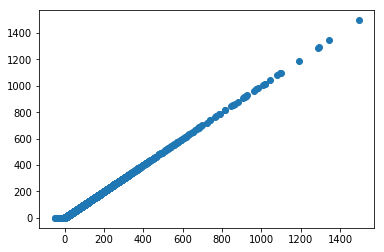

In [25]:
plt.scatter(df['DEP_DELAY'], df['DEP_DELAY_NEW'])

In order to correctly predict delay, we choose to keep **DEP_DELAY** with negative values.

## 1.5 Arrival Performance

Let's analyse arrival performance:

* First the **scheduled arrival time**:

In [26]:
df['CRS_ARR_TIME'].describe()

count    120000.000000
mean       1491.522600
std         516.263642
min           1.000000
25%        1106.000000
50%        1520.000000
75%        1920.000000
max        2359.000000
Name: CRS_ARR_TIME, dtype: float64

* The **real arrival** time can't be used for the predicition:

In [27]:
df['ARR_TIME'].describe()

count    118612.000000
mean       1473.081653
std         533.581585
min           1.000000
25%        1054.000000
50%        1512.000000
75%        1918.000000
max        2400.000000
Name: ARR_TIME, dtype: float64

* The **real arrival delay** is the value that we want to predict.

In [28]:
df['ARR_DELAY'].describe()

count    118385.000000
mean          3.365215
std          41.812745
min         -94.000000
25%         -14.000000
50%          -6.000000
75%           6.000000
max        1488.000000
Name: ARR_DELAY, dtype: float64

In [29]:
df['ARR_DELAY_NEW'].describe()

count    118385.000000
mean         11.722744
std          38.313344
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        1488.000000
Name: ARR_DELAY_NEW, dtype: float64

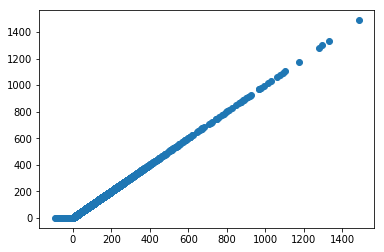

In [30]:
plt.scatter(df['ARR_DELAY'], df['ARR_DELAY_NEW'])

In order to correctly predict delay, we choose to keep **ARR_DELAY** with negative values.

## 1.5 Flight Summaries

**Scheduled elapsed time** and **distance** to travel are also 2 other indicators for the model.

In [31]:
df['CRS_ELAPSED_TIME'].describe()

count    120000.000000
mean        144.822417
std          75.944334
min          18.000000
25%          88.000000
50%         126.000000
75%         177.000000
max         695.000000
Name: CRS_ELAPSED_TIME, dtype: float64

In [32]:
df['DISTANCE'].describe()

count    120000.000000
mean        845.221150
std         615.738606
min          31.000000
25%         387.000000
50%         675.000000
75%        1090.000000
max        4983.000000
Name: DISTANCE, dtype: float64

Scheduled elapsed time **CRS_ELAPSED_TIME** and travel distance **DISTANCE** should also be important variable in the dataset.

## 1.6 Variable selection

After this first analyse, let's keep this selection:
* **CARRIER**
* **ORIGIN**
* **DESTINATION**
* **SCHEDULED ELAPSED TIME**
* **SCHEDULED DEPARTURE**
* **SCHEDULED ARRIVAL TIME**
* **DISTANCE**
* **ARRIVAL DELAY**

First define, a utils function to convert a string into datetime, **convert_to_datetime**:

In [33]:
def convert_to_datetime(x):
    if pd.isnull(x):
        return np.nan
    else:
        x = int(x)
        hour = x//100
        minute = x - hour*100
        dt = datetime.time(hour, minute)
        return dt

First define, a utils function to convert the departure string into datetime, **convert_to_departure_datetime**:

In [36]:
import datetime
def convert_to_departure_datetime(df):    
    liste = []
    for index, cols in df[['FL_DATE', 'CRS_DEP_TIME']].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        else:
            cols[0] = datetime.datetime.strptime(cols[0],"%Y-%m-%d")
            cols[1] = convert_to_datetime(cols[1])
            res = datetime.datetime.combine(cols[0],cols[1])
            liste.append(res)
    return (liste)

Let's process to the variable selection:

In [37]:
df['AIRLINE'] = df['CARRIER']
df['ORIGIN_AIRPORT'] = df['ORIGIN']
df['DESTINATION_AIRPORT'] = df['DEST']
df['SCHEDULED_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME']
df['SCHEDULED_DEPARTURE'] = convert_to_departure_datetime(df)
df['DEPARTURE_DELAY'] = df['DEP_DELAY'].astype(float)
df['SCHEDULED_ARRIVAL'] = df['CRS_ARR_TIME'].apply(convert_to_datetime)
df['ARRIVAL_DELAY'] = df['ARR_DELAY'].astype(float)
df['DISTANCE'] = df['DISTANCE'].astype(float)

In [38]:
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
        'SCHEDULED_ELAPSED_TIME',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL','DISTANCE','ARRIVAL_DELAY']]

In [39]:
df.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_ELAPSED_TIME,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DISTANCE,ARRIVAL_DELAY
0,EV,IAH,CRP,66.0,2016-01-06 17:35:00,0.0,18:41:00,201.0,9.0
1,B6,LGA,FLL,176.0,2016-01-17 21:40:00,15.0,00:36:00,1076.0,25.0
2,DL,MOB,ATL,74.0,2016-01-22 17:50:00,91.0,20:04:00,302.0,94.0
3,WN,CLE,BWI,80.0,2016-01-18 21:15:00,-11.0,22:35:00,314.0,-10.0
4,OO,DEN,SLC,96.0,2016-01-17 15:19:00,6.0,16:55:00,391.0,8.0


Let's analyse missing data contained in dataset

Text(0,0.5,'')

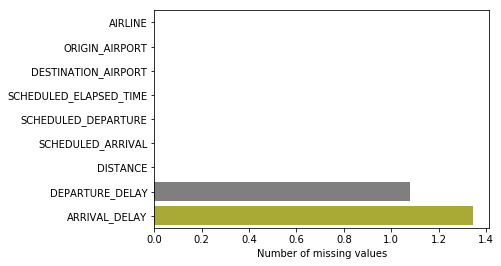

In [40]:
col = df.columns.get_values()
y = []
for var in col:
    missing = float(df[var].isnull().sum())
    count = float(df[var].count() + 1)
    y.append(float(missing/(missing+count)) * 100)
    
my_df = pd.DataFrame({'index': col, 'missing_values': y})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='missing_values', y="index", data=my_df, ax=ax)
ax.set_xlabel('Number of missing values')
ax.set_ylabel('')

Less than **2%** of the dataset are filled with missing values, let's remove them.

In [41]:
df.dropna(inplace=True)
df = df.reset_index()

Let's store the dataset.

In [42]:
df.to_csv('dataset_clean.csv', index=False)
#df = pd.read_csv('../../../../OPENCLASSROOMS/PROJET4/dataset_clean.csv', sep=',', error_bad_lines=False)
#df['Date'] = pd.to_datetime(df['Date'], coerce=True)

# 2 Analyse

## 2.1 Variation of delay inside the different carriers

Let's analyse the variation of **arrival delay** for different carriers:

In [43]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
stats = df['ARRIVAL_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
stats = stats.sort_values('count')
stats

,count,max,mean,min
AIRLINE,,,,
VX,1455.0,222.0,5.349828,-63.0
HA,1614.0,545.0,-0.450434,-44.0
F9,2096.0,683.0,6.530057,-63.0
NK,2801.0,1014.0,9.108176,-55.0
AS,3563.0,328.0,-2.689868,-69.0
B6,6089.0,798.0,8.765643,-75.0
EV,10419.0,1175.0,5.733372,-56.0
UA,11271.0,993.0,1.500222,-79.0
OO,12716.0,1282.0,4.273199,-54.0


We can observe that some compagnies recording the highest number of flight (as WN) have a mean delay below other compagnies recording lowest number of flight (as NK)

In order to complete this analyse, we can define different group of delay:
- delay below 5 min
- delay between 5 min and 45 min
- delay above 45 min

In [44]:
arrival_delay_level = lambda x:((0,1)[x > 5],2)[x > 45]
df['ARRIVAL_DELAY_LEVEL'] = df['ARRIVAL_DELAY'].apply(arrival_delay_level)

Text(0.5,0,'Delay repartition per company')

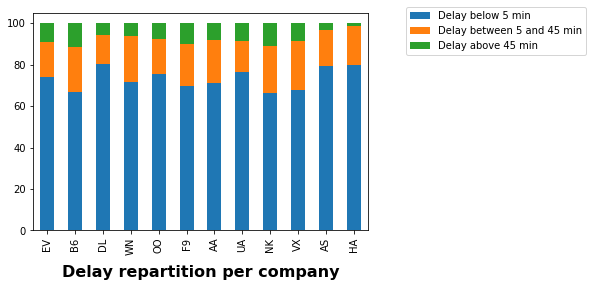

In [45]:
from __future__ import division
delay_0 = []
delay_1 = []
delay_2 = []
airlines = df['AIRLINE'].unique()
#____________________________________________________
for airline in airlines:
    count = len(df[df['AIRLINE'] == airline])
    delay_0.append(100 * (1 - ((count - len(df[(df['ARRIVAL_DELAY_LEVEL'] == 0) & (df['AIRLINE'] == airline)])) / count )))
    delay_1.append(100 * (1 - ((count - len(df[(df['ARRIVAL_DELAY_LEVEL'] == 1) & (df['AIRLINE'] == airline)])) / count )))
    delay_2.append(100 * (1 - ((count - len(df[(df['ARRIVAL_DELAY_LEVEL'] == 2) & (df['AIRLINE'] == airline)])) / count )))

#____________________________________________________
my_df = pd.DataFrame({'delay_0': delay_0, 'delay_1': delay_1, 'delay_2': delay_2, 'index': airline})
ax = my_df.plot(kind='bar', stacked=True)
ax.set_xticklabels(airlines)

#____________________________________________________
L = ax.legend(bbox_to_anchor=(1.1, 1.05))
L.get_texts()[0].set_text('Delay below 5 min')
L.get_texts()[1].set_text('Delay between 5 and 45 min')
L.get_texts()[2].set_text('Delay above 45 min')

plt.xlabel('Delay repartition per company', fontsize=16, weight = 'bold', labelpad=10)


We confirm the previous observation, carriers have a lot of variation of delays.

## 2.2 Variation of delay for the same route

Text(0.5,1,'Flights from San Francisco, CA to New York, NY')

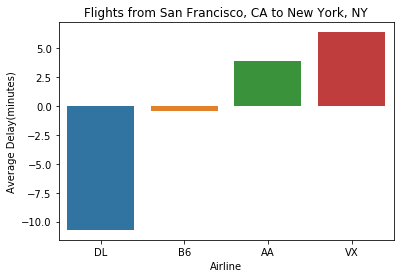

In [46]:
# San Francisco, CA: San Francisco International -> New York, NY: John F. Kennedy International
df_subset = df[(df.ORIGIN_AIRPORT == 'SFO') & (df.DESTINATION_AIRPORT == 'JFK')]

carrier_list = df_subset["AIRLINE"].unique()
carrier_mean_delay = []

for carrier in carrier_list:
    carrier_mean_delay.append(df_subset[df_subset.AIRLINE == carrier]["ARRIVAL_DELAY"].mean())

my_df = pd.DataFrame({'index': carrier_list, 'missing_values': carrier_mean_delay})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='index', y="missing_values", data=my_df, ax=ax)
ax.set_xlabel('Airline')
ax.set_ylabel('Average Delay(minutes)')
ax.set_title('Flights from San Francisco, CA to New York, NY')

The **arrival delay** is changing a a lot between different airlines:
* **VX** compagnie shows a positive delay
* **DL** compagnie shows a negative delay

## 2.3 Variation of delay using temperal factors: month

Let's observe the **arrival delay** variation for all month

Text(0.5,1,'Flight delay based on month departure')

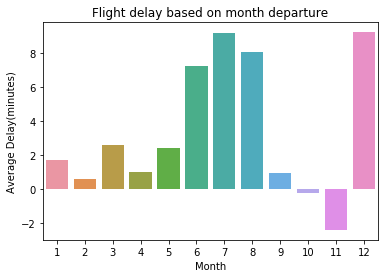

In [47]:
# Flight delay on all month
df_subset = df

month_list = df_subset.SCHEDULED_DEPARTURE.dt.month.unique()
month_mean_delay = []

for month in month_list:
    month_mean_delay.append(df_subset[df_subset.SCHEDULED_DEPARTURE.dt.month == month]["ARRIVAL_DELAY"].mean())

my_df = pd.DataFrame({'index': month_list, 'missing_values': month_mean_delay})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='index', y="missing_values", data=my_df, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Average Delay(minutes)')
ax.set_title('Flight delay based on month departure')

We can observe a sort of seasonality:
* average delay seems higher during **summer** (month 6/7) and for **christmas** period (month 12)

Text(0.5,1,'Flights from San Francisco, CA to New York, NY')

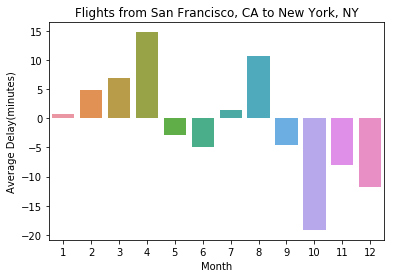

In [48]:
# San Francisco, CA: San Francisco International -> New York, NY: John F. Kennedy International
df_subset = df[(df.ORIGIN_AIRPORT == 'SFO') & (df.DESTINATION_AIRPORT == 'JFK')]

month_list = df_subset.SCHEDULED_DEPARTURE.dt.month.unique()
month_mean_delay = []

for month in month_list:
    month_mean_delay.append(df_subset[df_subset.SCHEDULED_DEPARTURE.dt.month == month]["ARRIVAL_DELAY"].mean())

my_df = pd.DataFrame({'index': month_list, 'missing_values': month_mean_delay})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='index', y="missing_values", data=my_df, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Average Delay(minutes)')
ax.set_title('Flights from San Francisco, CA to New York, NY')

For a specific travel, we don't see the same thing. The delay is **the smallest** for **summer** and **christmas** holidays.

## 2.4 Variation of delay using temperal factors: day

Let's observe the variation of arrival delay, day per day.

Text(0.5,1,'Flights delay based on day departure')

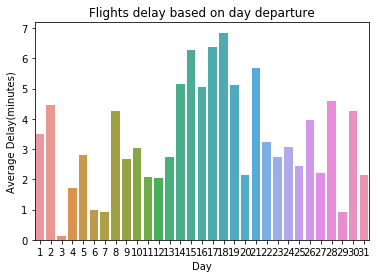

In [49]:
# Let's find ORIGIN_AIRPORT_ID
df_subset = df

day_list = df_subset.SCHEDULED_DEPARTURE.dt.day.unique()
day_mean_delay = []

for day in day_list:
    day_mean_delay.append(df_subset[df_subset.SCHEDULED_DEPARTURE.dt.day == day]["ARRIVAL_DELAY"].mean())

my_df = pd.DataFrame({'index': day_list, 'missing_values': day_mean_delay})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='index', y="missing_values", data=my_df, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Average Delay(minutes)')
ax.set_title('Flights delay based on day departure')

We can observe the arrival delay is highest in the middle of month.

Text(0.5,1,'Flights from San Francisco, CA to New York, NY')

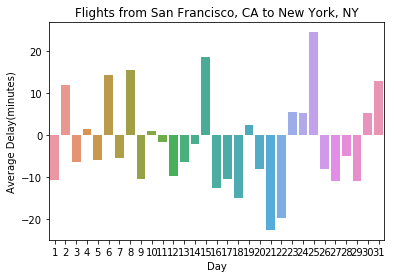

In [50]:
# Let's find ORIGIN_AIRPORT_ID
df_subset = df[(df.ORIGIN_AIRPORT == 'SFO') & (df.DESTINATION_AIRPORT == 'JFK')]

day_list = df_subset.SCHEDULED_DEPARTURE.dt.day.unique()
day_mean_delay = []

for day in day_list:
    day_mean_delay.append(df_subset[df_subset.SCHEDULED_DEPARTURE.dt.day == day]["ARRIVAL_DELAY"].mean())

my_df = pd.DataFrame({'index': day_list, 'missing_values': day_mean_delay})
my_df = my_df.sort_values('missing_values')

fig, ax = plt.subplots()

sns.barplot(x='index', y="missing_values", data=my_df, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Average Delay(minutes)')
ax.set_title('Flights from San Francisco, CA to New York, NY')

If we observe the same thing for a specific travel, we don't see the same thing. It more weekly periodicity.

## 2.4 Variation of delay using origin airport

Let's observe the variation of delay per airline based on origin.

In [51]:
airlines = df['AIRLINE'].unique()
origin_airport_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
origin_airport_delays.set_index(0, drop = True, inplace = True)

for airline in airlines:
    df1 = df[df['AIRLINE'] == airline]
    test = df1['ARRIVAL_DELAY'].groupby(df1['ORIGIN_AIRPORT']).apply(get_stats)
    origin_airport_delays[airline] = test.loc[:, 'mean'] 

Text(0.5,0,'Delay in minutes')

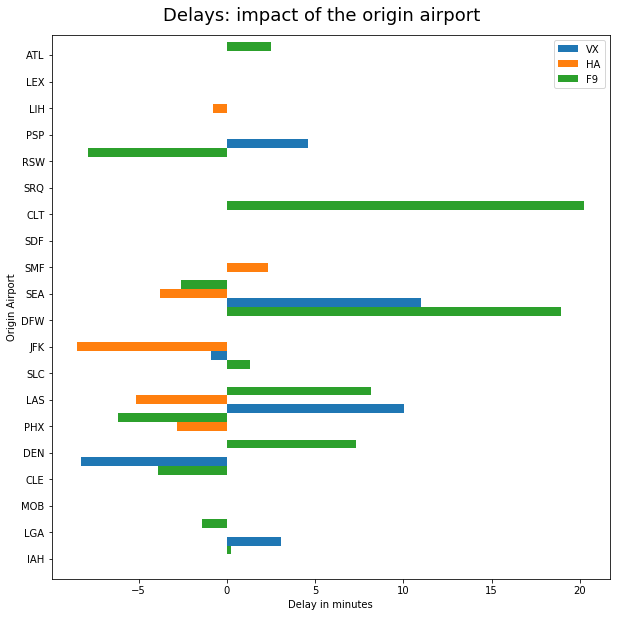

In [52]:
fig = plt.figure(1, figsize=(10,10))
fig.text(0.5, 0.9, "Delays: impact of the origin airport", ha='center', fontsize = 18)
subset = origin_airport_delays[['VX','HA','F9']]
ax = fig.add_subplot(1,1,1)
subset[:20].plot(kind='barh', width=1, ax=ax)
ax.set_ylabel('Origin Airport')
ax.set_xlabel('Delay in minutes')

We can see that the mean delay for the company 'VX' is not the same observing origin airport.

In [53]:
df.drop('index',inplace=True, axis=1)
df.drop('DEPARTURE_DELAY',inplace=True, axis=1)
df.drop('ARRIVAL_DELAY_LEVEL',inplace=True, axis=1)
df.to_csv('dataset_clean.csv', index=False)

**CONCLUSION**
We have just demonstrated that:
* all the companies do not have the same performance using amount of flight criteria or a selected travel criteria.
* the departure day plays a role in the arrival delay.
* the tuple origin/destination also play a role in the arrival delay.